# Big picture

Given features of Iris plants, Predict their species

![Iris flowers](images/iriss.png "Iris Flowers")

# Ingest

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# My library
import my_functions

In [2]:
# Ingest function
def get_iris():
    """
    This function loads the iris dataset from sklearn datasets
    """
    # Load dataset, get the featues and labels
    dataset = load_iris(as_frame=True)
    feature=dataset.data
    label=dataset.target

    # Merge the featues and labels into one dataframe
    df = feature.copy()
    df["species"] = label

    # Convert the target into acutal classes
    target = {
        0: "setosa",
        1: "versicolor",
        2: "virginica"
    }
    
    df['species'] = df["species"].map(target)

    rename_col = {
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width"
    }
    df = df.rename(columns=rename_col)
   
    return df

In [3]:
iris_df = get_iris()

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
train, test = train_test_split(
    iris_df, test_size=0.3, shuffle=True,
    random_state=42, stratify=iris_df["species"]
)

In [6]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
68,6.2,2.2,4.5,1.5,versicolor
19,5.1,3.8,1.5,0.3,setosa
143,6.8,3.2,5.9,2.3,virginica
99,5.7,2.8,4.1,1.3,versicolor


In [7]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
63,6.1,2.9,4.7,1.4,versicolor
133,6.3,2.8,5.1,1.5,virginica
56,6.3,3.3,4.7,1.6,versicolor
127,6.1,3.0,4.9,1.8,virginica


# EDA

In [8]:
# Missing DATA
my_functions.missing_data(train).T

,Total,Percent,Types
sepal_length,0,0.0,float64
sepal_width,0,0.0,float64
petal_length,0,0.0,float64
petal_width,0,0.0,float64
species,0,0.0,object


No missing data

In [9]:
# Unique values
my_functions.unique_values(train, max_colwidth=500)

,Total,Uniques,Values
sepal_length,105,33,"[[5.1, 6.2, 6.8, 5.7, 6.7, 4.9, 4.4, 7.1, 6.5, 5.0, 6.0, 5.5, 7.2, 4.7, 5.9, 5.4, 6.3, 7.6, 7.7, 4.6, 6.9, 5.8, 5.6, 4.8, 7.9, 6.4, 6.1, 4.5, 5.2, 4.3, 7.4, 5.3, 7.0]]"
sepal_width,105,22,"[[2.5, 2.2, 3.8, 3.2, 2.8, 3.0, 3.1, 2.9, 2.4, 3.4, 3.3, 2.7, 3.7, 3.9, 4.4, 3.5, 2.3, 3.6, 2.6, 4.1, 2.0, 4.2]]"
petal_length,105,39,"[[3.0, 4.5, 1.5, 5.9, 4.1, 5.2, 1.6, 1.4, 5.1, 3.8, 6.0, 5.7, 4.8, 4.9, 6.6, 6.7, 4.2, 1.3, 4.0, 3.6, 4.4, 5.0, 6.4, 5.6, 1.9, 6.1, 3.9, 3.7, 5.5, 4.6, 4.7, 4.3, 6.9, 5.3, 1.1, 5.8, 1.7, 3.5, 5.4]]"
petal_width,105,19,"[[1.1, 1.5, 0.3, 2.3, 1.3, 0.1, 0.2, 2.1, 2.0, 1.8, 0.4, 2.5, 1.2, 1.0, 1.4, 1.9, 1.6, 2.4, 2.2]]"
species,105,3,"[[versicolor, setosa, virginica]]"


There's not much unique values even though they are continuous.
Maybe Iris plants dont grow up to be very large

Question. Which types of plants were measured. And how matured are they

No comment

In [10]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.055238,3.784762,1.205714
std,0.862941,0.457203,1.784052,0.777549
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Boxplot per feature

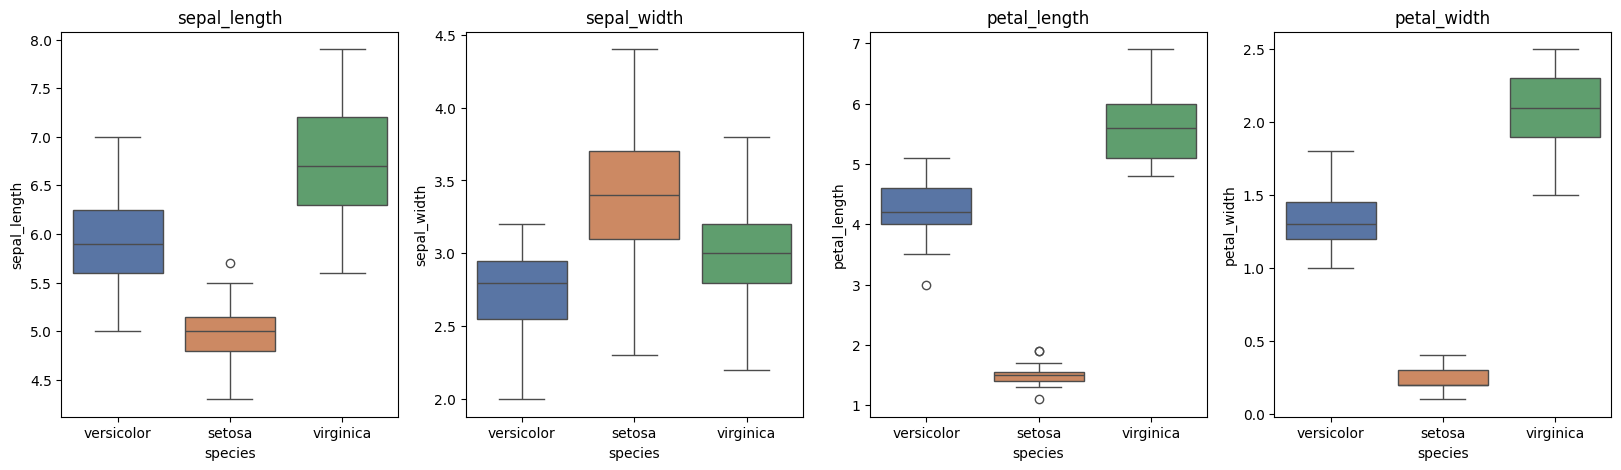

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

n = 0

for i in train.columns[:4]:
    if i != "Species":
        sns.boxplot(data=train, x="species", y=i, ax=axes[n], hue='species', palette='deep')
        axes[n].set_title(i)
        n += 1

The petal length and petal width of Setosa tends to be very small

Setosa is separable from from versicolor and virginica

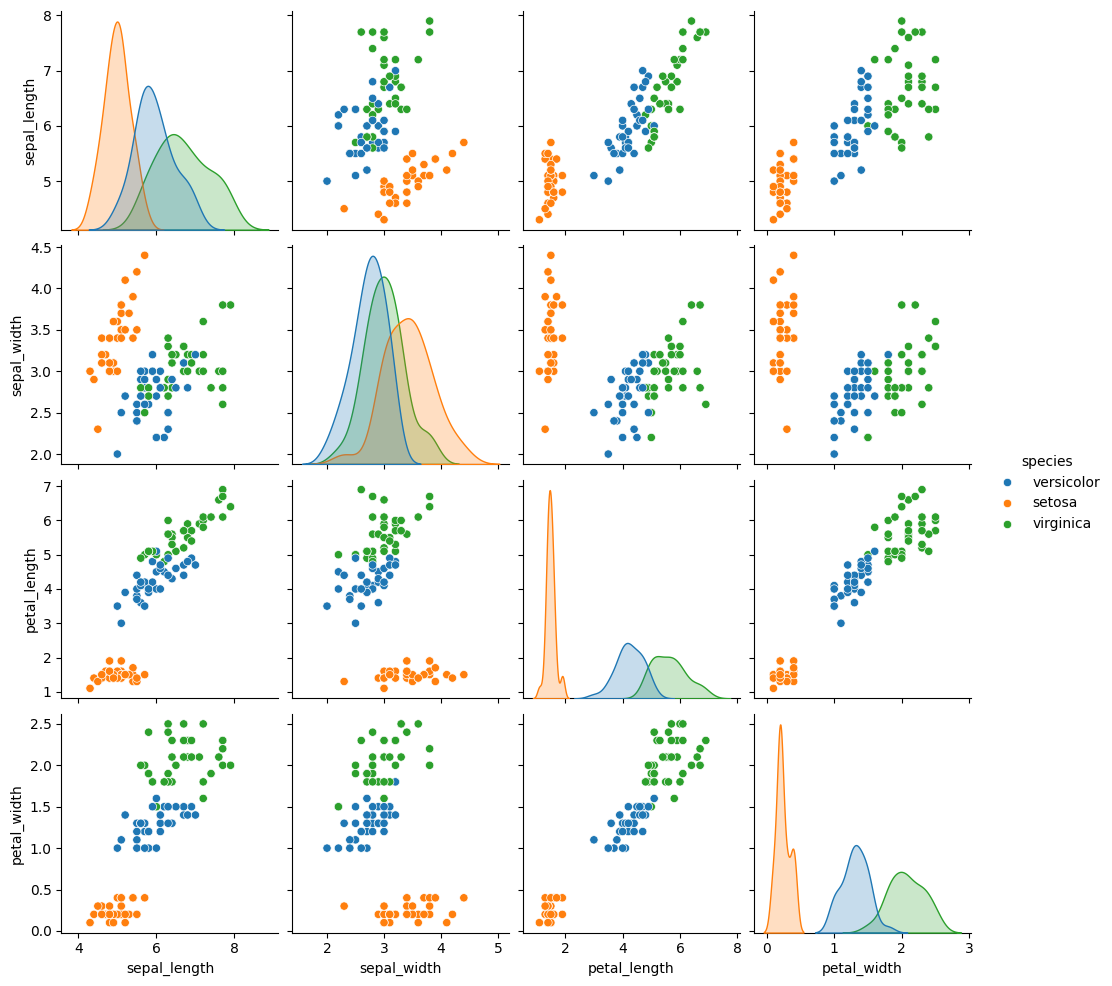

In [13]:
# Pairplots
sns.pairplot(data=train, hue="species");

Setosa is linearly separable from Verginica and versicolor.  
The distinction between Verginical and versicolor is blurry so i expect a linear model to have trouble differentiating them  
But we have four features. It mght actually be separable in higher dimension. So let's see what happens

In [14]:
target = {
        "setosa": 0,
        "versicolor": 1,
        "virginica": 2
    }

In [15]:
train["species"] = train['species'].map(target)

In [16]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,1
68,6.2,2.2,4.5,1.5,1
19,5.1,3.8,1.5,0.3,0
143,6.8,3.2,5.9,2.3,2
99,5.7,2.8,4.1,1.3,1


In [17]:
# Correlations
iris_corr = train.corr()
# iris_corr

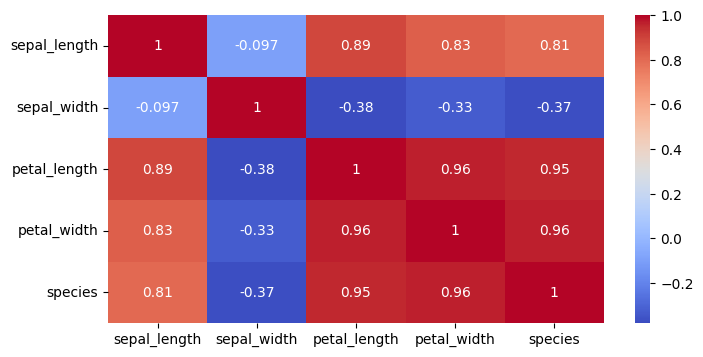

In [18]:
# Visualize the correlations
plt.figure(figsize=(8,4))
sns.heatmap(iris_corr,cmap="coolwarm",annot=True);

In [19]:
train.describe().loc[['min', 'max'], :].T

,min,max
sepal_length,4.3,7.9
sepal_width,2.0,4.4
petal_length,1.1,6.9
petal_width,0.1,2.5
species,0.0,2.0


The range is very small. Perform Standard scaling

## Wrangle function

In [20]:
# Ingest function
def get_iris():
    """
    This function loads the iris dataset from sklearn datasets
    """
    # Load dataset, get the featues and labels
    dataset = load_iris(as_frame=True)
    feature=dataset.data
    label=dataset.target

    # Merge the featues and labels into one dataframe
    df = feature.copy()
    df["species"] = label

    # Convert the target into acutal classes
    target = {
        0: "setosa",
        1: "versicolor",
        2: "virginica"
    }
    
    df['species'] = df["species"].map(target)

    rename_col = {
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width"
    }
    df = df.rename(columns=rename_col)
   
    return df

In [21]:
df = get_iris()

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
# Transform the dataset into a more useable format

def split_and_transform_iris(df):
    df = df.copy()

    target = {
        "setosa": 0,
        "versicolor": 1,
        "virginica": 2
    }

    df["species"] = df['species'].map(target) 

    target_col = 'species'
    X, y = df.drop(columns=[target_col]), df[target_col]

    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, shuffle=True, random_state=42, stratify=y)
    
    return X_train, y_train, X_test, y_test

In [24]:
X_train, y_train, X_test, y_test = split_and_transform_iris(df)